## MODELAGEM DE DISPERSÃO

In [3]:
# Função para determinar a classe de estabilidade de Pasquill
def determinarClasseEstabilidade(velocidade_vento, insolar_solar=None, cobertura_nuvens=None, periodo='dia'):
    if periodo == 'dia':
        if insolar_solar not in ['alta', 'moderada', 'baixa']:
            raise ValueError("insolar_solar deve ser 'alta', 'moderada' ou 'baixa' durante o dia.")
        
        if insolar_solar == 'alta':
            if velocidade_vento < 2:
                return 'A'
            elif 2 <= velocidade_vento < 3:
                return 'B'
            elif 3 <= velocidade_vento < 5:
                return 'C'
            else:
                return 'D'
        elif insolar_solar == 'moderada':
            if velocidade_vento < 2:
                return 'B'
            elif 2 <= velocidade_vento < 3:
                return 'B'
            elif 3 <= velocidade_vento < 5:
                return 'C'
            else:
                return 'D'
        elif insolar_solar == 'baixa':
            if velocidade_vento < 2:
                return 'C'
            elif 2 <= velocidade_vento < 3:
                return 'C'
            elif 3 <= velocidade_vento < 5:
                return 'D'
            else:
                return 'D'
    
    elif periodo == 'noite':
        if cobertura_nuvens not in ['claro', 'parcialmente_nublado', 'nublado']:
            raise ValueError("cobertura_nuvens deve ser 'claro', 'parcialmente_nublado' ou 'nublado' durante a noite.")
        
        if cobertura_nuvens == 'claro':
            if velocidade_vento < 2:
                return 'F'
            elif 2 <= velocidade_vento < 3:
                return 'E'
            elif 3 <= velocidade_vento < 5:
                return 'D'
            else:
                return 'D'
        elif cobertura_nuvens == 'parcialmente_nublado':
            if velocidade_vento < 2:
                return 'E'
            elif 2 <= velocidade_vento < 3:
                return 'D'
            elif 3 <= velocidade_vento < 5:
                return 'D'
            else:
                return 'D'
        elif cobertura_nuvens == 'nublado':
            if velocidade_vento < 2:
                return 'D'
            elif 2 <= velocidade_vento < 3:
                return 'D'
            elif 3 <= velocidade_vento < 5:
                return 'D'
            else:
                return 'D'
    
    else:
        raise ValueError("Período deve ser 'dia' ou 'noite'.")

In [4]:
def sigmaXY(x, classe, urbOrRural):
    if urbOrRural == 'urbano':
        if classe == 'A' or classe == 'B':
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** 0.5
        elif classe == 'C':
            sigmaY = 0.22 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.20 * x * (1 + 0.001 * x) ** 0.5
        elif classe == 'D':
            sigmaY = 0.16 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.14 * x * (1 + 0.0003 * x) ** (-0.5)
        elif classe == 'E' or classe == 'F':
            sigmaY = 0.11 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.001 * x) ** (-0.5)
        else:
            raise ValueError('Classe de estabilidade errada')
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.12 * x
        elif classe == 'C':
            sigmaY = 0.11 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0001 * x) ** (-0.5)
        elif classe == 'D':
            sigmaY = 0.08 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.06 * x * (1 + 0.0001 * x) ** (-0.5)
        elif classe == 'E':
            sigmaY = 0.06 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.03 * x * (1 + 0.0003 * x) ** (-1)
        elif classe == 'F':
            sigmaY = 0.04 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.016 * x * (1 + 0.0003 * x) ** (-1)
        else:
            raise ValueError('Classe de estabilidade errada')
    else:
        raise ValueError('Tipo de área inválido')

     # Garantir que sigmaY e sigmaZ não sejam zero para evitar divisões por zero
    sigmaY = np.maximum(sigmaY, 0.001)
    sigmaZ = np.maximum(sigmaZ, 0.001)

    
    return sigmaY, sigmaZ
   



In [5]:
import numpy as np

# Função para estimar o deltaH com base na equação de Davidson-Bryant
def deltaHdavidsonBryant(d, vs, u, Ts, Tamb):
    deltaH = (d * (vs / u)**(1.4)) * (1 + (Ts - Tamb) / Ts)
    return deltaH



In [6]:
# Criando uma função do modelo gaussiano

def modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H):
    termo1 = qs / (2 * np.pi * sigmaY * sigmaZ * u)
    termo2 = np.exp((-y**2) / (2 * sigmaY**2))
    termo3 = np.exp((-(z - H)**2) / (2 * sigmaZ**2)) + np.exp((-(z + H)**2) / (2 * sigmaZ**2))
    conc = termo1 * termo2 * termo3
    conc = conc * 10**6  # Convertendo para microgramas por metro cúbico
    return conc

In [7]:

# Utilizando a função do modelo gaussiano
x = 1000  # distância maior para verificar a dispersão em uma área considerável
classe = 'A'
urbOrRural = 'urbano'
qs = 100  # g/s
u = 10  # m/s
y = 0  # estimando na direção do vento
z = 1.5  # altura do nariz
H = 50  # m

# Calculando sigmaY e sigmaZ
sigmaY, sigmaZ = sigmaXY(x, classe, urbOrRural)

# Imprimindo os valores intermediários para verificação
print("sigmaY = {:.6f}, sigmaZ = {:.6f}".format(sigmaY, sigmaZ))

# Chamando a função do modelo gaussiano
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H)

print("A concentração estimada é = {:.2f} μg/m³".format(conc))


sigmaY = 270.449362, sigmaZ = 339.411255
A concentração estimada é = 34.30 μg/m³


deltaH = 2.700592857381857
A pluma subiu


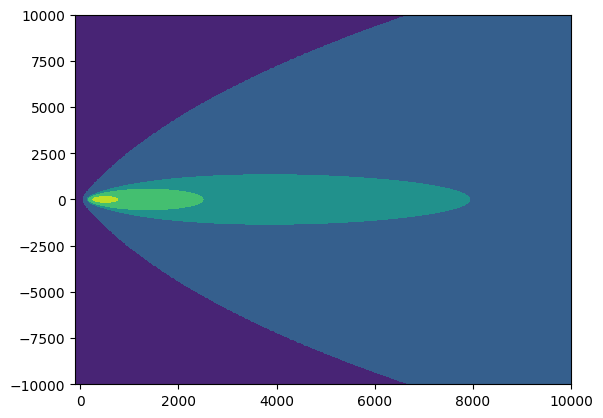

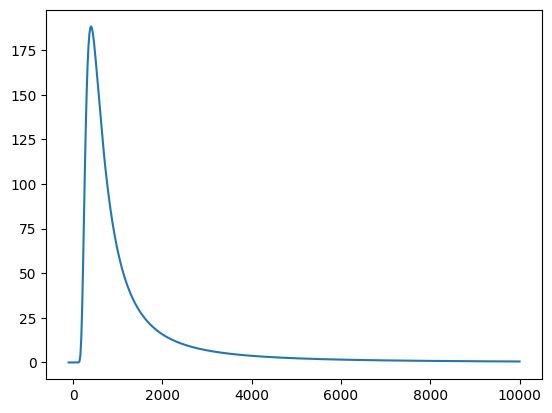

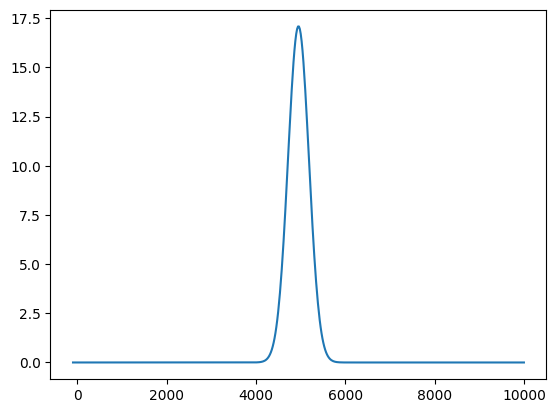

In [8]:
# Criando domínio de modelagem 
x = np.linspace(-100,10000,500)
#print(x)
y = np.linspace(-10000,10000,500)

# Criando matrizes de x e y
xx,yy = np.meshgrid(x,y)
#print(xx.shape)


# Adotando inputs
classe = 'A'
urbOrRural = 'urbano' 
hg = 150 # m altura geométrica da chaminé
qs = 100 # g/s
u = 5 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
d = 1 # em metros
vs = 10 # em m/s
Ts = 300 # em Kelvin
Tamb = 293 # em Kelvin

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY,sigmaZ = sigmaXY(xx,classe,urbOrRural)
#print(sigmaY)

if vs>1.5*u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = deltaHdavidsonBryant(d,vs,u,Ts,Tamb)
    print('deltaH = '+str(deltaH))
    hef = hg+deltaH
    print('A pluma subiu')
else:
    hef = hg +2*d*((vs/u)-1.5)
    print('A pluma caiu')

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY, sigmaZ,u,yy,z,hef)

# Visualização dos resultados no espaço
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
fig,ax = plt.subplots()
ax.contourf(xx,yy,conc+0.1,norm = LogNorm())

# Corte em y - sobre o eixo x
fig,ax = plt.subplots()
ax.plot(x,conc[250,:])

# Corte em x - sobre o eixo y 
fig,ax = plt.subplots()
ax.plot(x,conc[:,100])

In [9]:
def holland_tipdownwash(d, vs, u, Ts, Tamb, hg):
   # Calcula a sobrelevação da pluma sem considerar o efeito Tip-Downwash
    deltaH =((vs*d)/u) * (1.5 + 2.68*(10**(-10))*1013.25*((Ts-Tamb)/Ts)*d)
    return deltaH

deltaH = 3.00000001267238
A pluma subiu


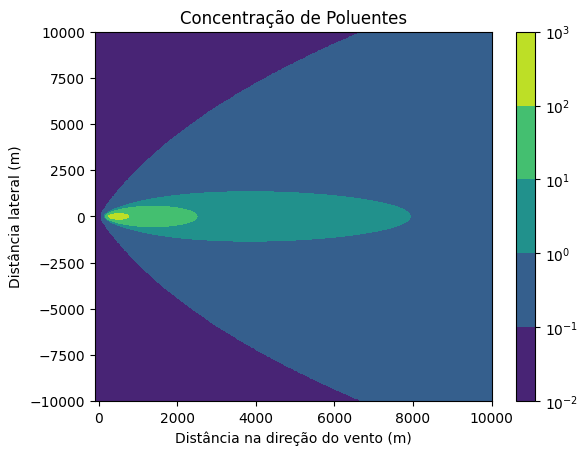

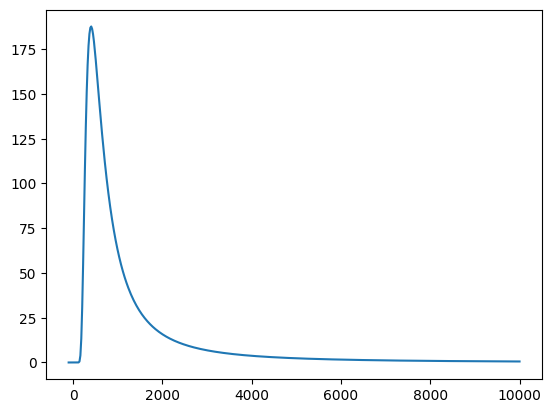

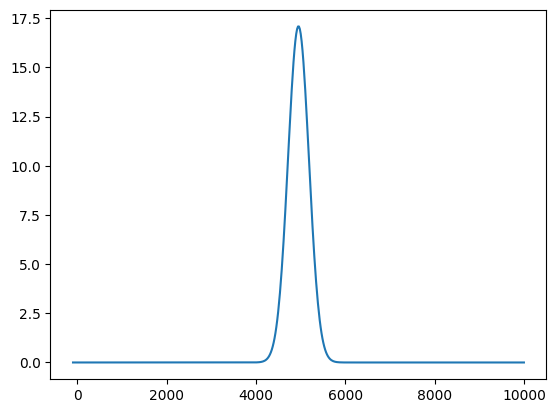

In [10]:



# Adotando inputs
classe = 'A'
urbOrRural = 'urbano' 
hg = 150 # m altura geométrica da chaminé
qs = 100 # g/s
sigmaY = 10 # m
sigmaZ = 15 # m
u = 5 # m/s
y = 0 # estimando na direção do vento
z = 1.5 # altura do nariz
d = 1 # em metros
vs = 10 # em m/s
Ts = 300 # em Kelvin
Tamb = 293 # em Kelvin

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY,sigmaZ = sigmaXY(xx,classe,urbOrRural)
#print(sigmaY)

if vs>1.5*u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH =holland_tipdownwash(d, vs, u, Ts, Tamb, hg)
    print('deltaH = '+str(deltaH))
    h = hg+ deltaH
    print('A pluma subiu')
else:
    h = hg +2*d*((vs/u)-1.5)
    print('A pluma caiu')

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,yy,z,h)

# Visualização dos resultados no espaço
fig, ax = plt.subplots()
cf = ax.contourf(xx, yy, conc + 0.1, norm=LogNorm())
plt.colorbar(cf)
plt.title("Concentração de Poluentes")
plt.xlabel("Distância na direção do vento (m)")
plt.ylabel("Distância lateral (m)")
plt.show()


# Corte em y - sobre o eixo x
fig,ax = plt.subplots()
ax.plot(x,conc[250,:])

# Corte em x - sobre o eixo y 
fig,ax = plt.subplots()
ax.plot(x,conc[:,100])



Fonte: recovery_boiler, Poluente: MP


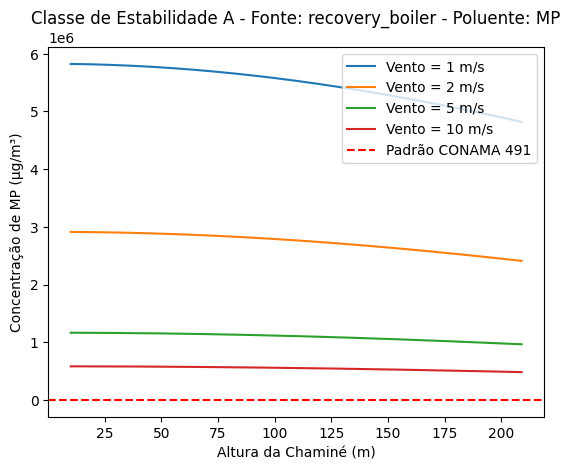

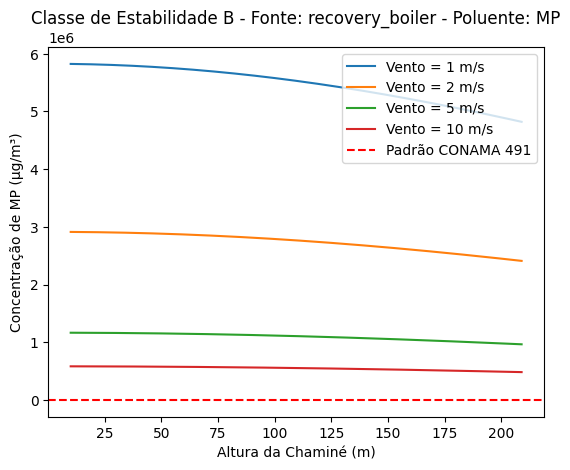

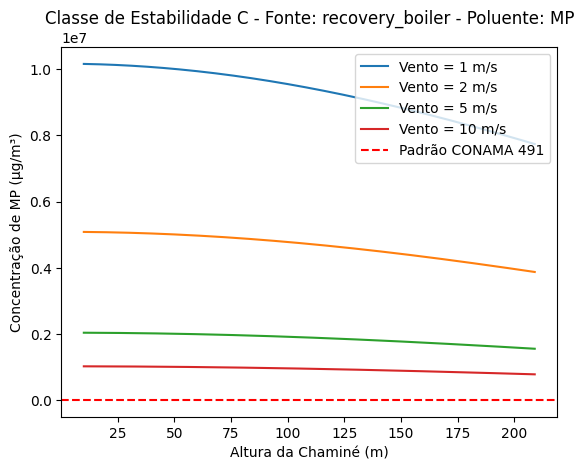

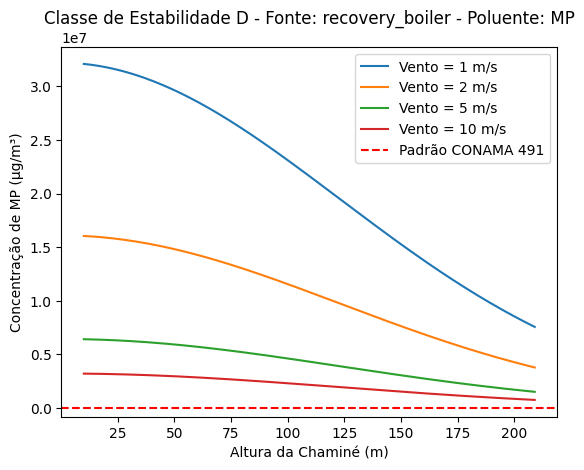

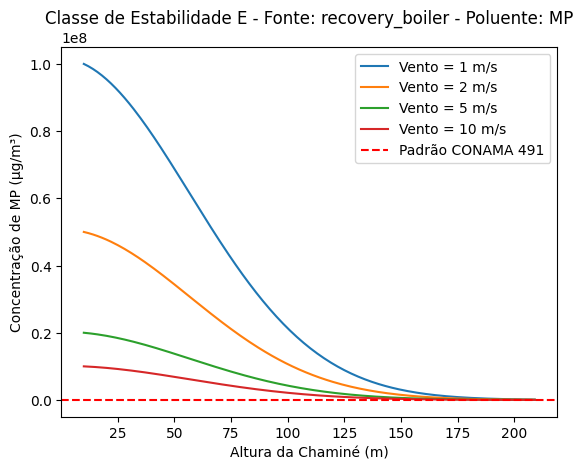

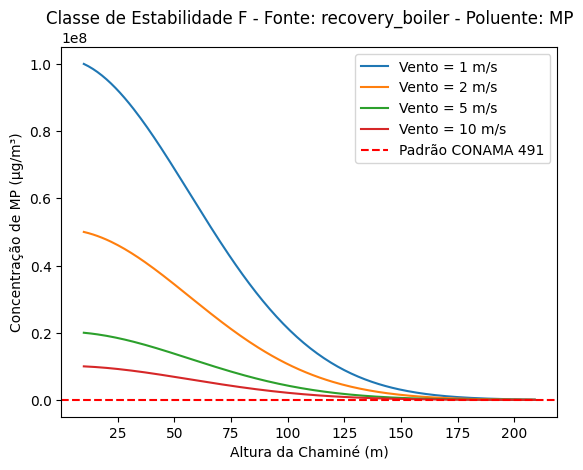

Fonte: smelt_tank, Poluente: MP


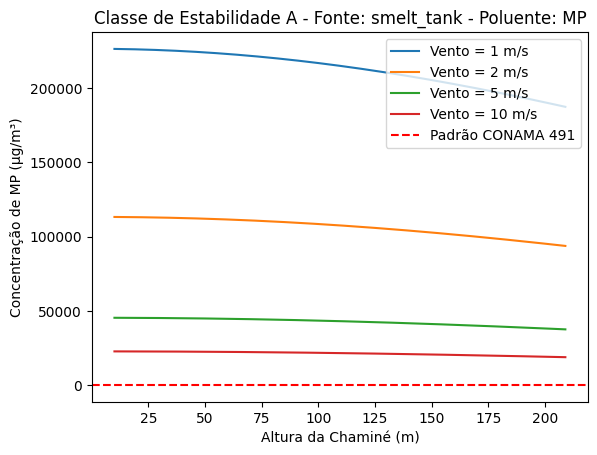

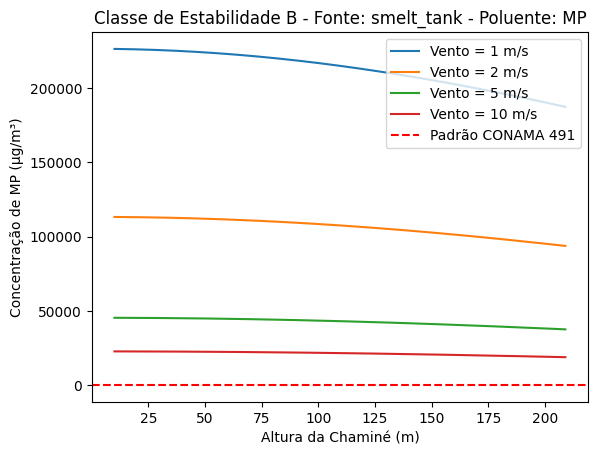

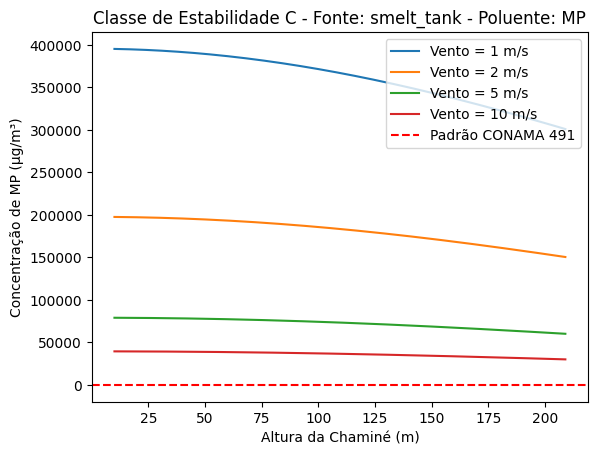

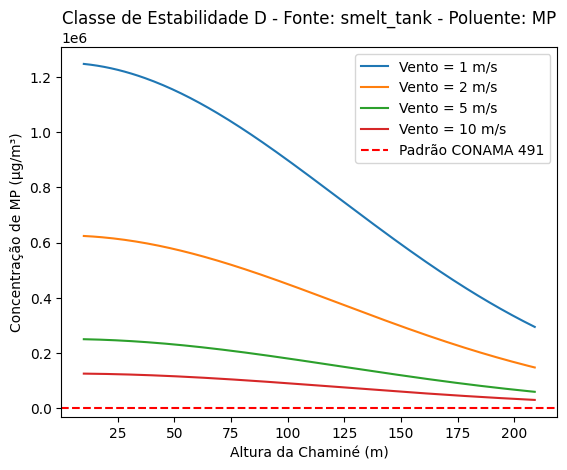

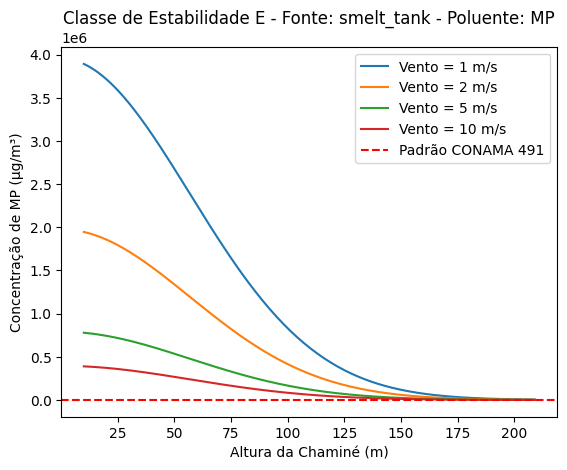

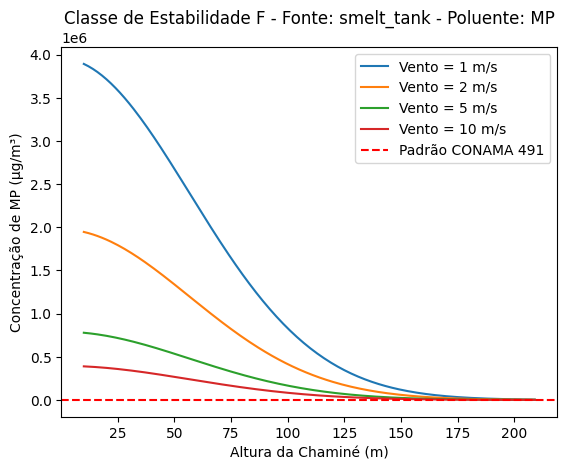

Fonte: lime_kiln, Poluente: MP


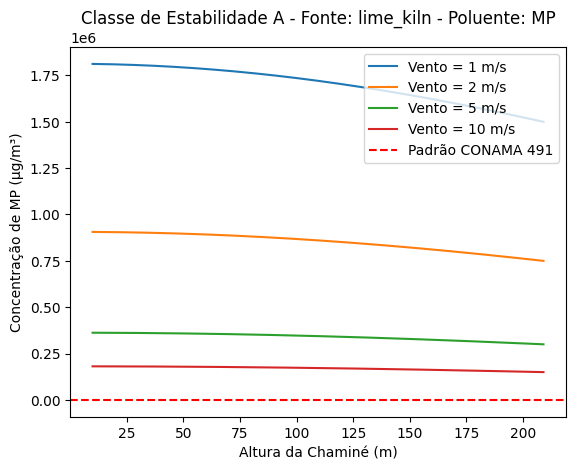

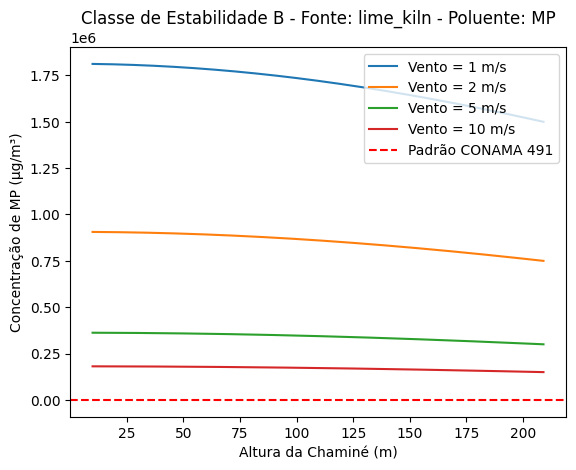

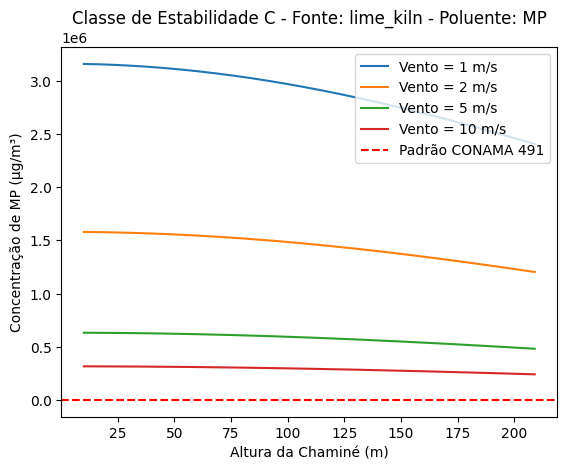

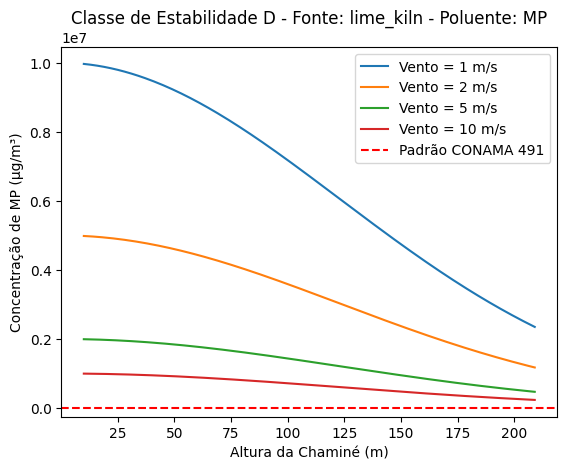

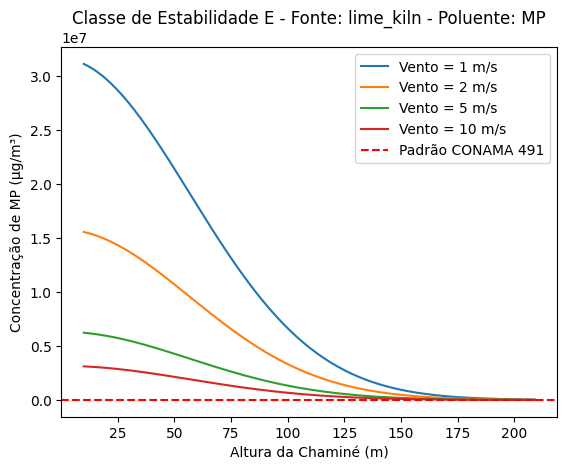

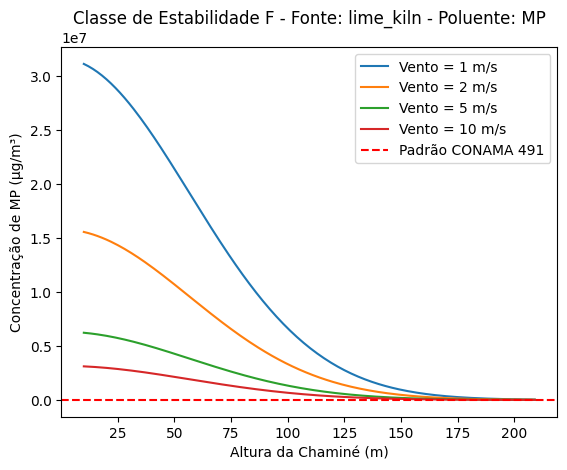

Fonte: recovery_boiler, Poluente: SO2


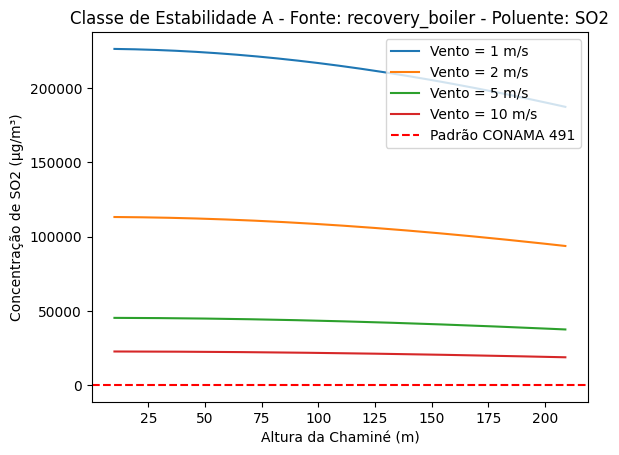

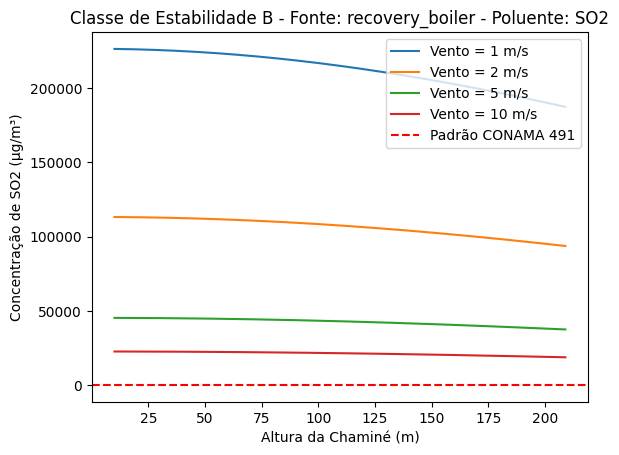

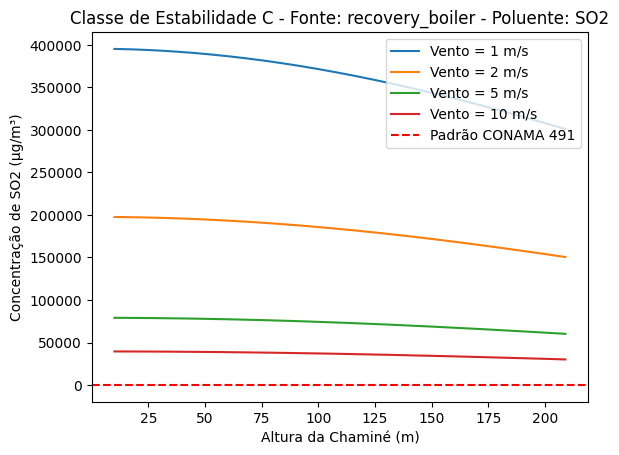

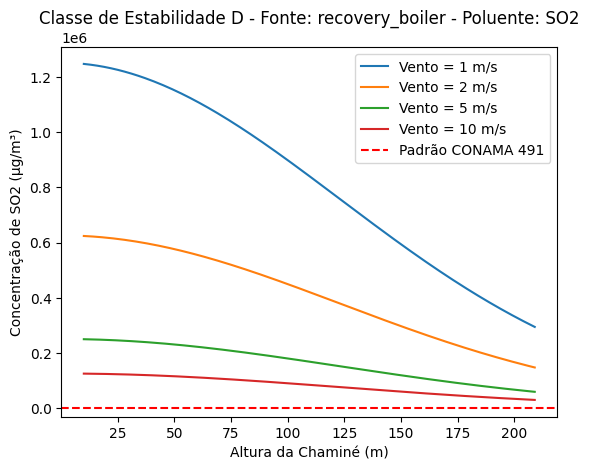

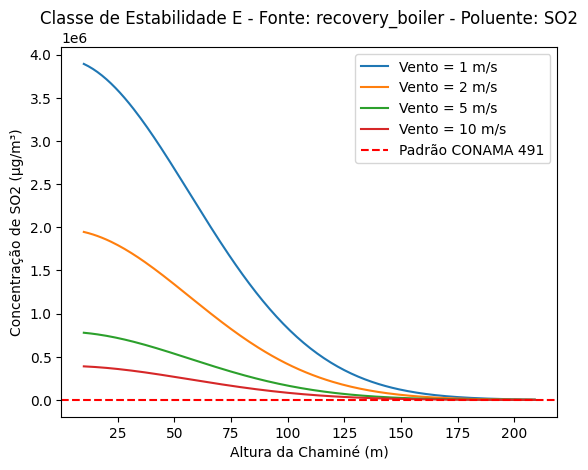

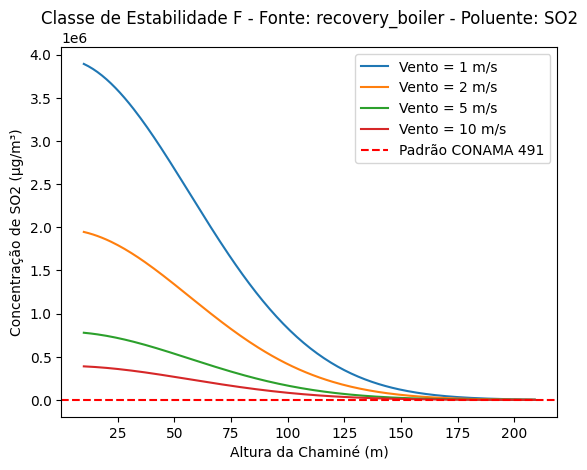

Fonte: smelt_tank, Poluente: SO2


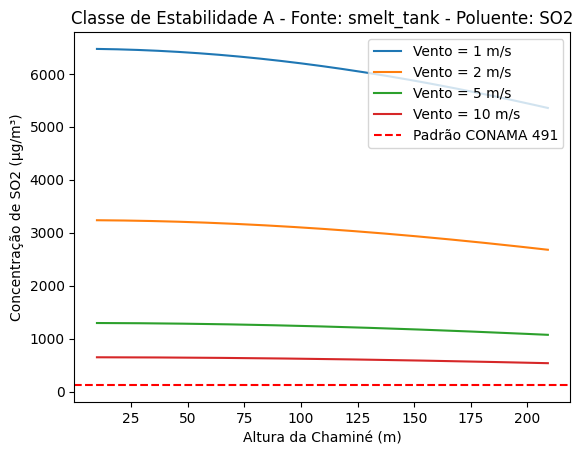

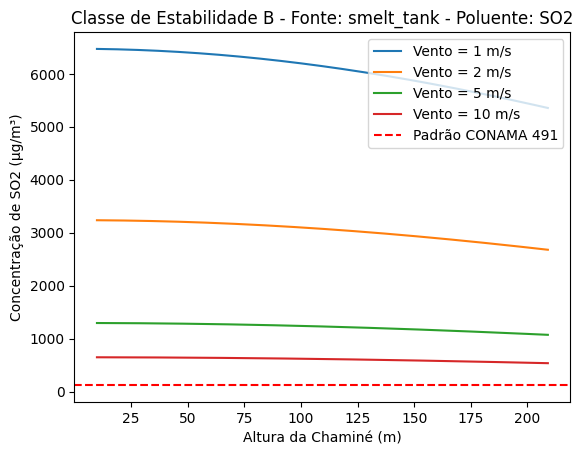

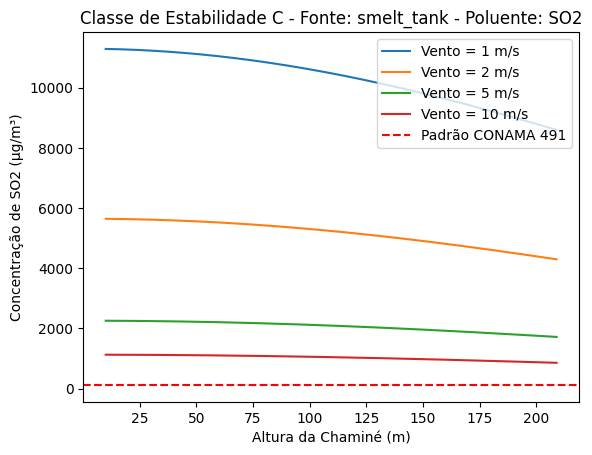

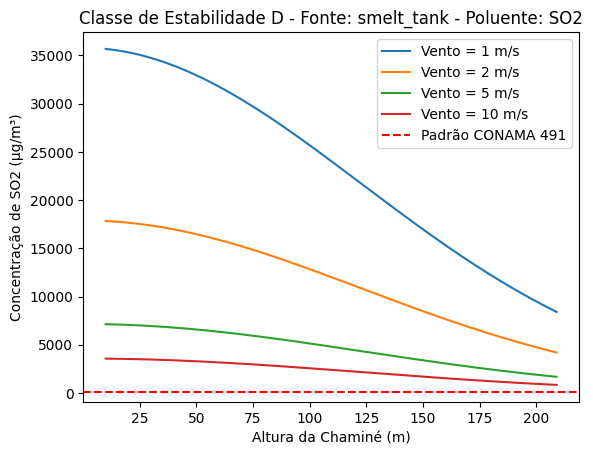

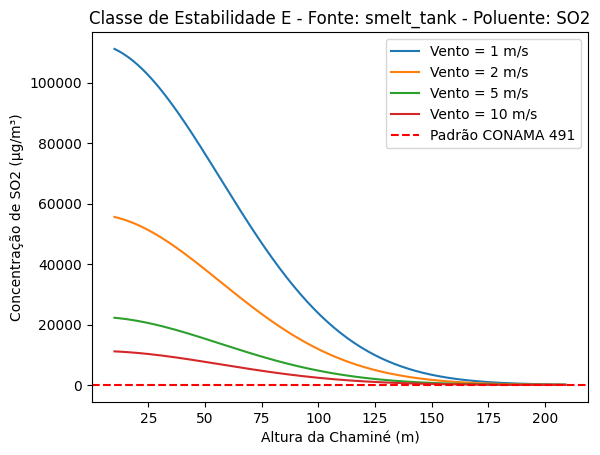

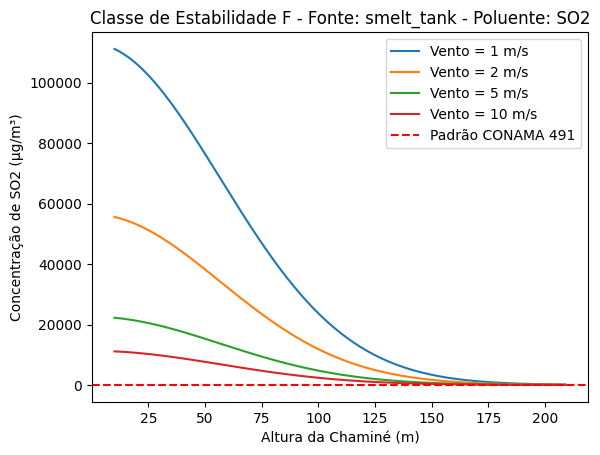

Fonte: lime_kiln, Poluente: SO2


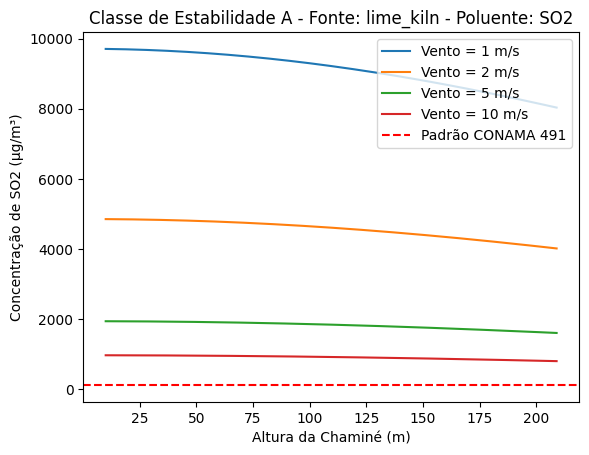

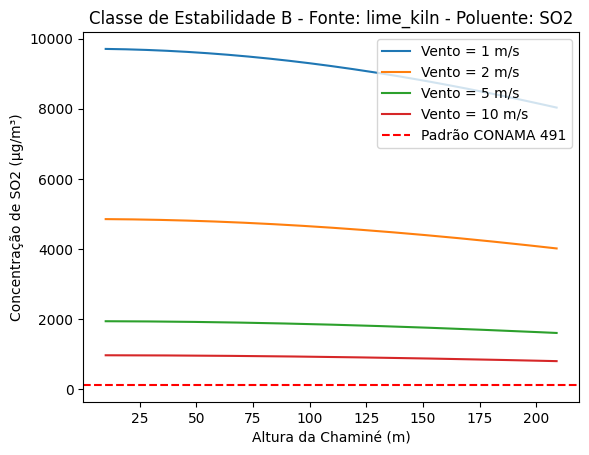

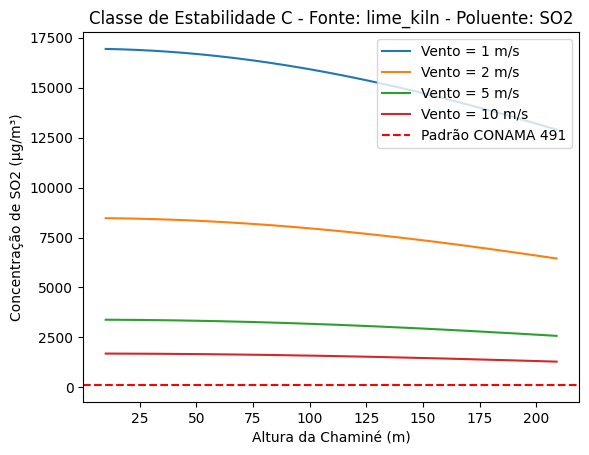

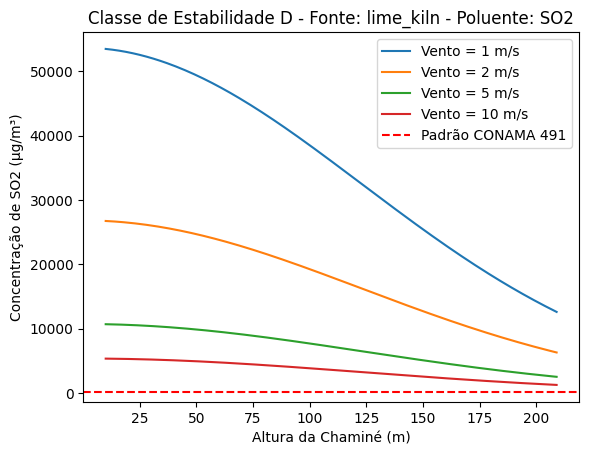

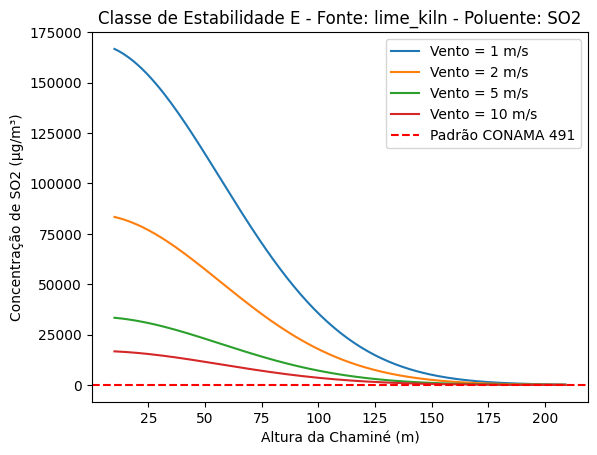

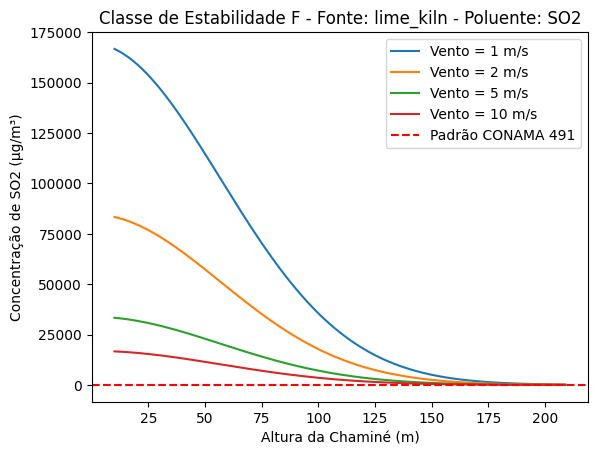

Fonte: recovery_boiler, Poluente: CO


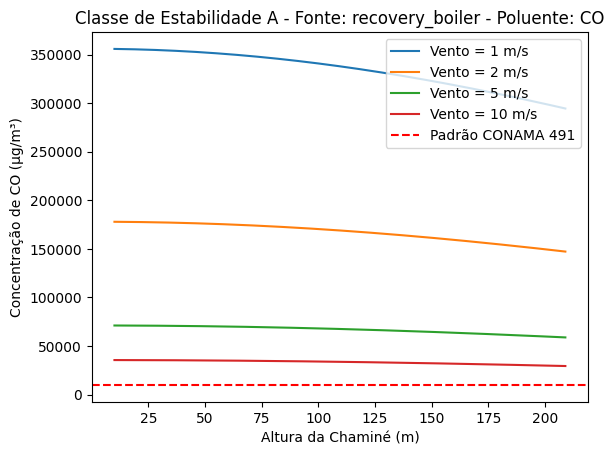

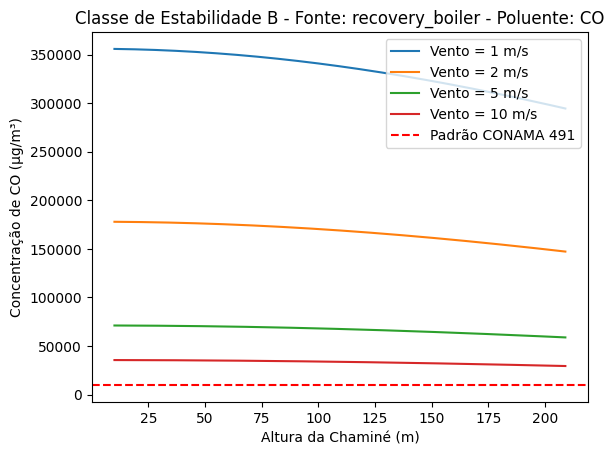

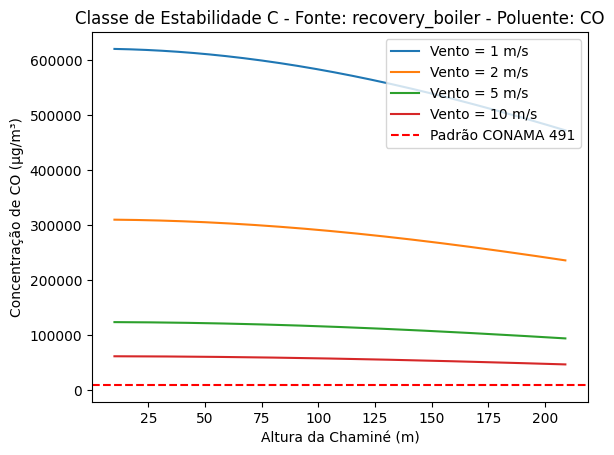

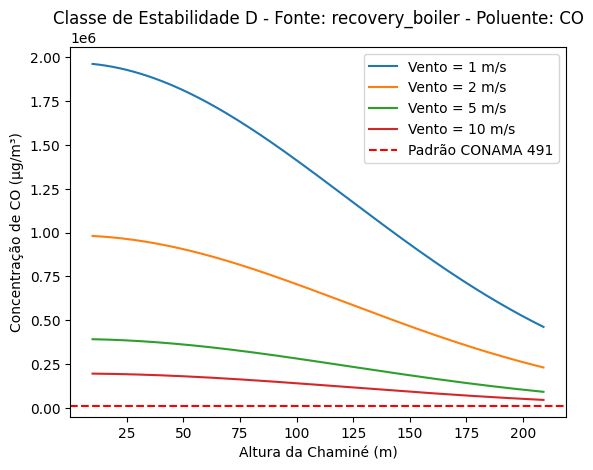

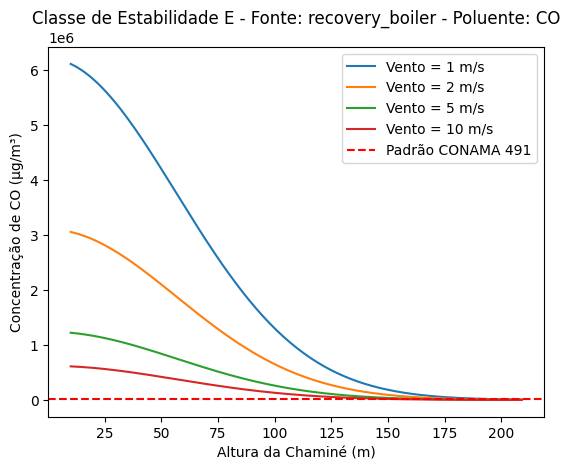

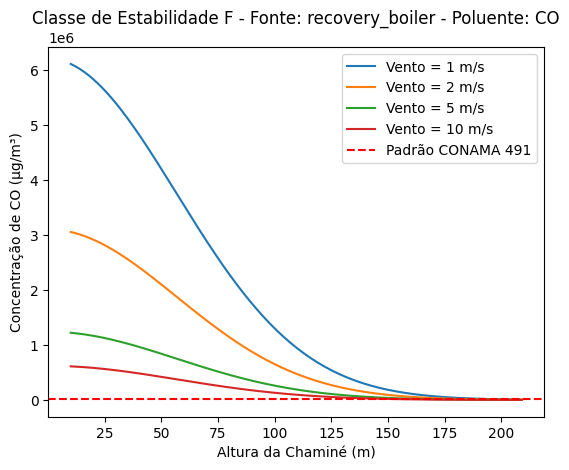

Fonte: smelt_tank, Poluente: CO


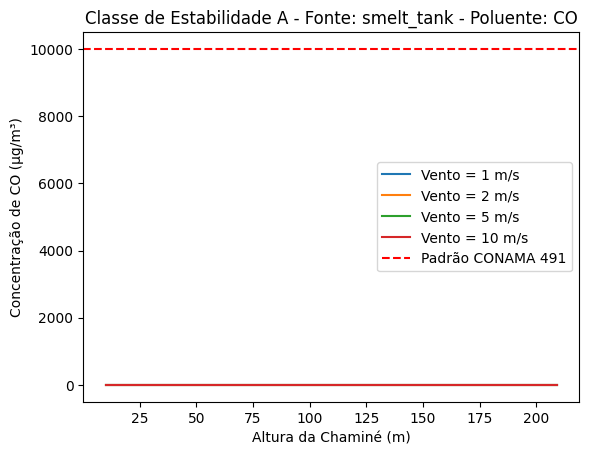

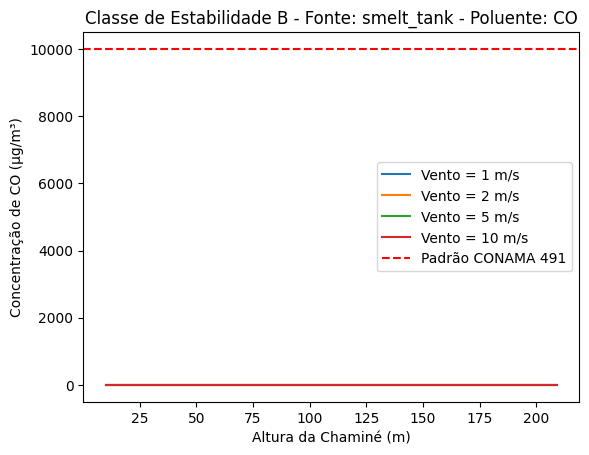

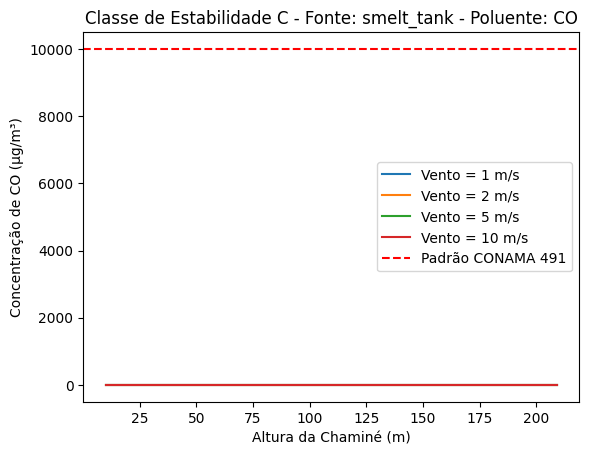

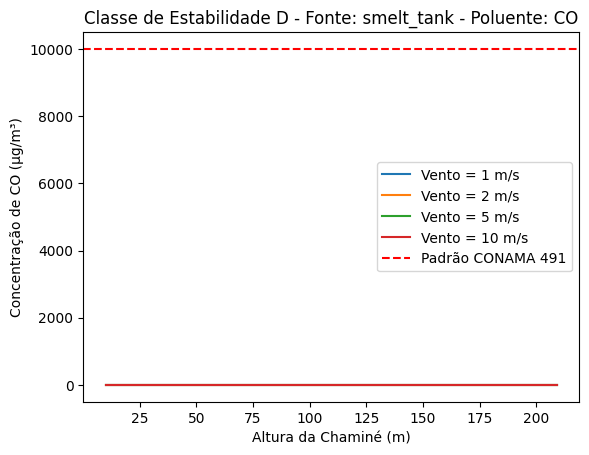

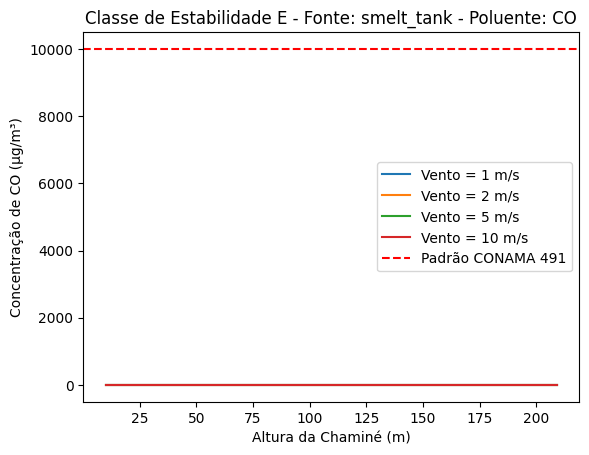

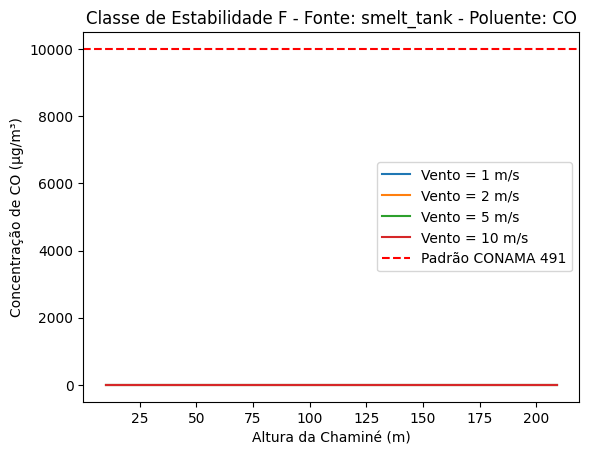

Fonte: lime_kiln, Poluente: CO


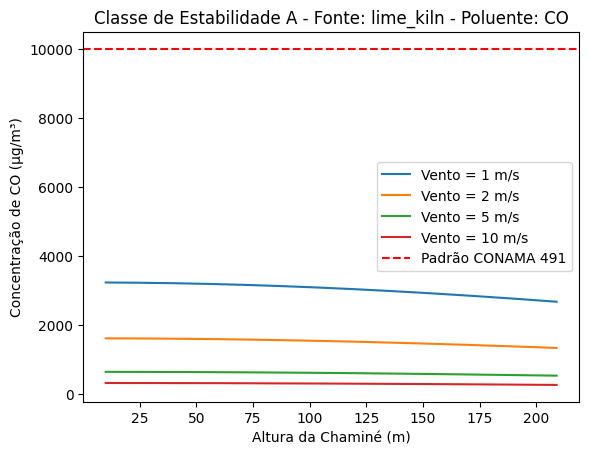

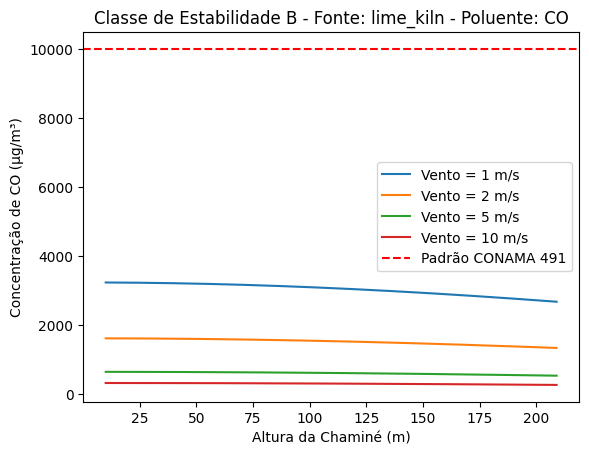

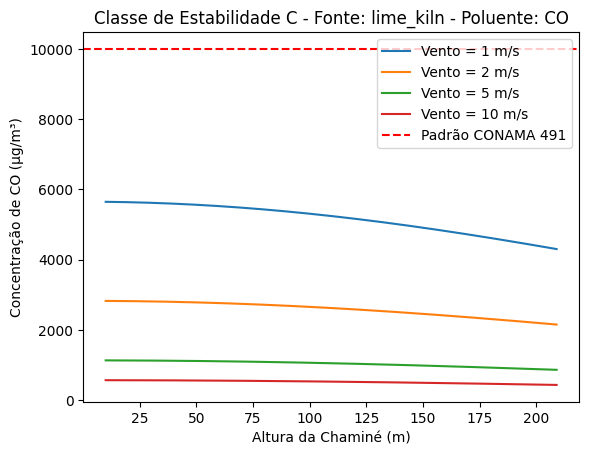

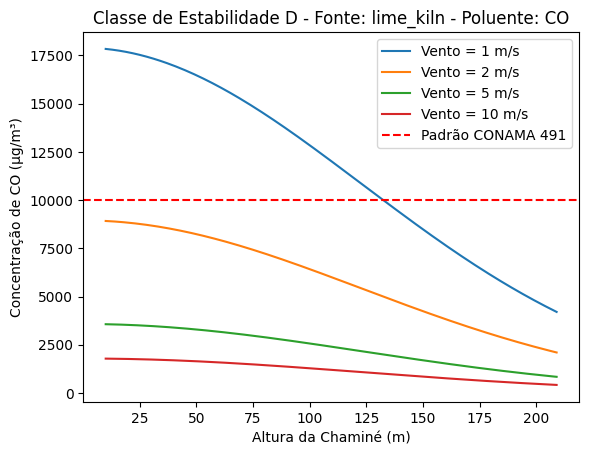

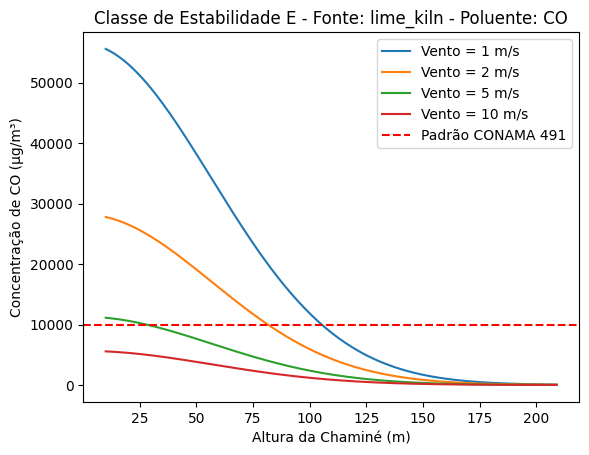

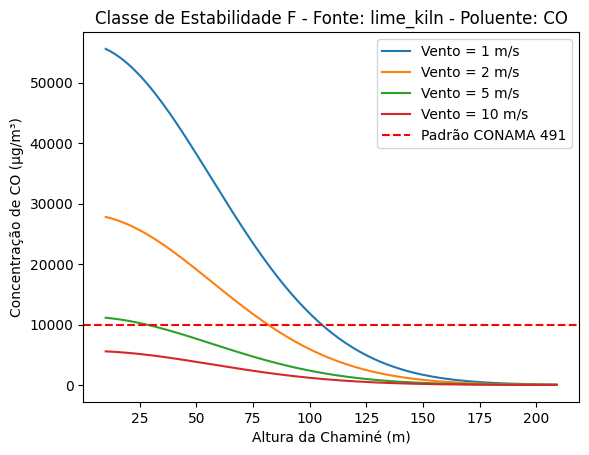

In [11]:
import numpy as np
import matplotlib.pyplot as plt

sigmaY,sigmaZ = sigmaXY(x,classe,urbOrRural)
conc = modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,h)
# Parâmetros da simulação
emissoes = {
    'recovery_boiler': {
        'MP': 1679911.6152,  # g/s
        'SO2': 65329.8961,   # g/s
        'CO': 102661.2654    # g/s
    },
    'smelt_tank': {
        'MP': 65329.8961,    # g/s
        'SO2': 1866.5685,    # g/s
        'CO': 0.0            # g/s
    },
    'lime_kiln': {
        'MP': 522639.1692,   # g/s
        'SO2': 2799.8527,    # g/s
        'CO': 933.2842       # g/s
    }
}

velocidades_vento = [1, 2, 5, 10]  # Diferentes velocidades do vento (m/s)
alturas_chamine = np.arange(10, 210)  # Alturas da chaminé (m)
classes_estabilidade = ['A', 'B', 'C', 'D', 'E', 'F']  # Classes de estabilidade
area_tipo = 'urbano'  # Tipo de área (urbano ou rural)

# Padrões da Resolução CONAMA 491 para poluentes (µg/m³)
padrao_conama_mp = 50   # Para Material Particulado (MP10)
padrao_conama_so2 = 125  # Para Dióxido de Enxofre (SO2)
padrao_conama_co = 10000  # Para Monóxido de Carbono (CO), em µg/m³ (equivalente a 10 mg/m³)

# Ponto de interesse para avaliação (x, y, z)
x = 1000  # Distância na direção do vento (m)
y = 0     # Posição lateral (m)
z = 1.5   # Altura de respiração (m)

# Realizar simulações e plotar resultados
for poluente in ['MP', 'SO2', 'CO']:
    for fonte in emissoes:
        Q = emissoes[fonte][poluente]  # Taxa de emissão para a fonte e poluente
        padrao_conama = padrao_conama_mp if poluente == 'MP' else (padrao_conama_so2 if poluente == 'SO2' else padrao_conama_co)
        print(f"Fonte: {fonte}, Poluente: {poluente}")
        for estabilidade in classes_estabilidade:
            fig, ax = plt.subplots()
            for u in velocidades_vento:
                concentracoes = []
                for H in alturas_chamine:
                    sigmaY, sigmaZ = sigmaXY(x, estabilidade, area_tipo)  # Corrigido para usar 'estabilidade' e 'area_tipo'
                    conc = modeloGaussiano(Q, sigmaY, sigmaZ, u, y, z, H)
                    concentracoes.append(conc)
                ax.plot(alturas_chamine, concentracoes, label=f'Vento = {u} m/s')

            ax.axhline(padrao_conama, color='r', linestyle='--', label='Padrão CONAMA 491')
            ax.set_xlabel('Altura da Chaminé (m)')
            ax.set_ylabel(f'Concentração de {poluente} (µg/m³)')
            ax.set_title(f'Classe de Estabilidade {estabilidade} - Fonte: {fonte} - Poluente: {poluente}')
            ax.legend()
            plt.show()

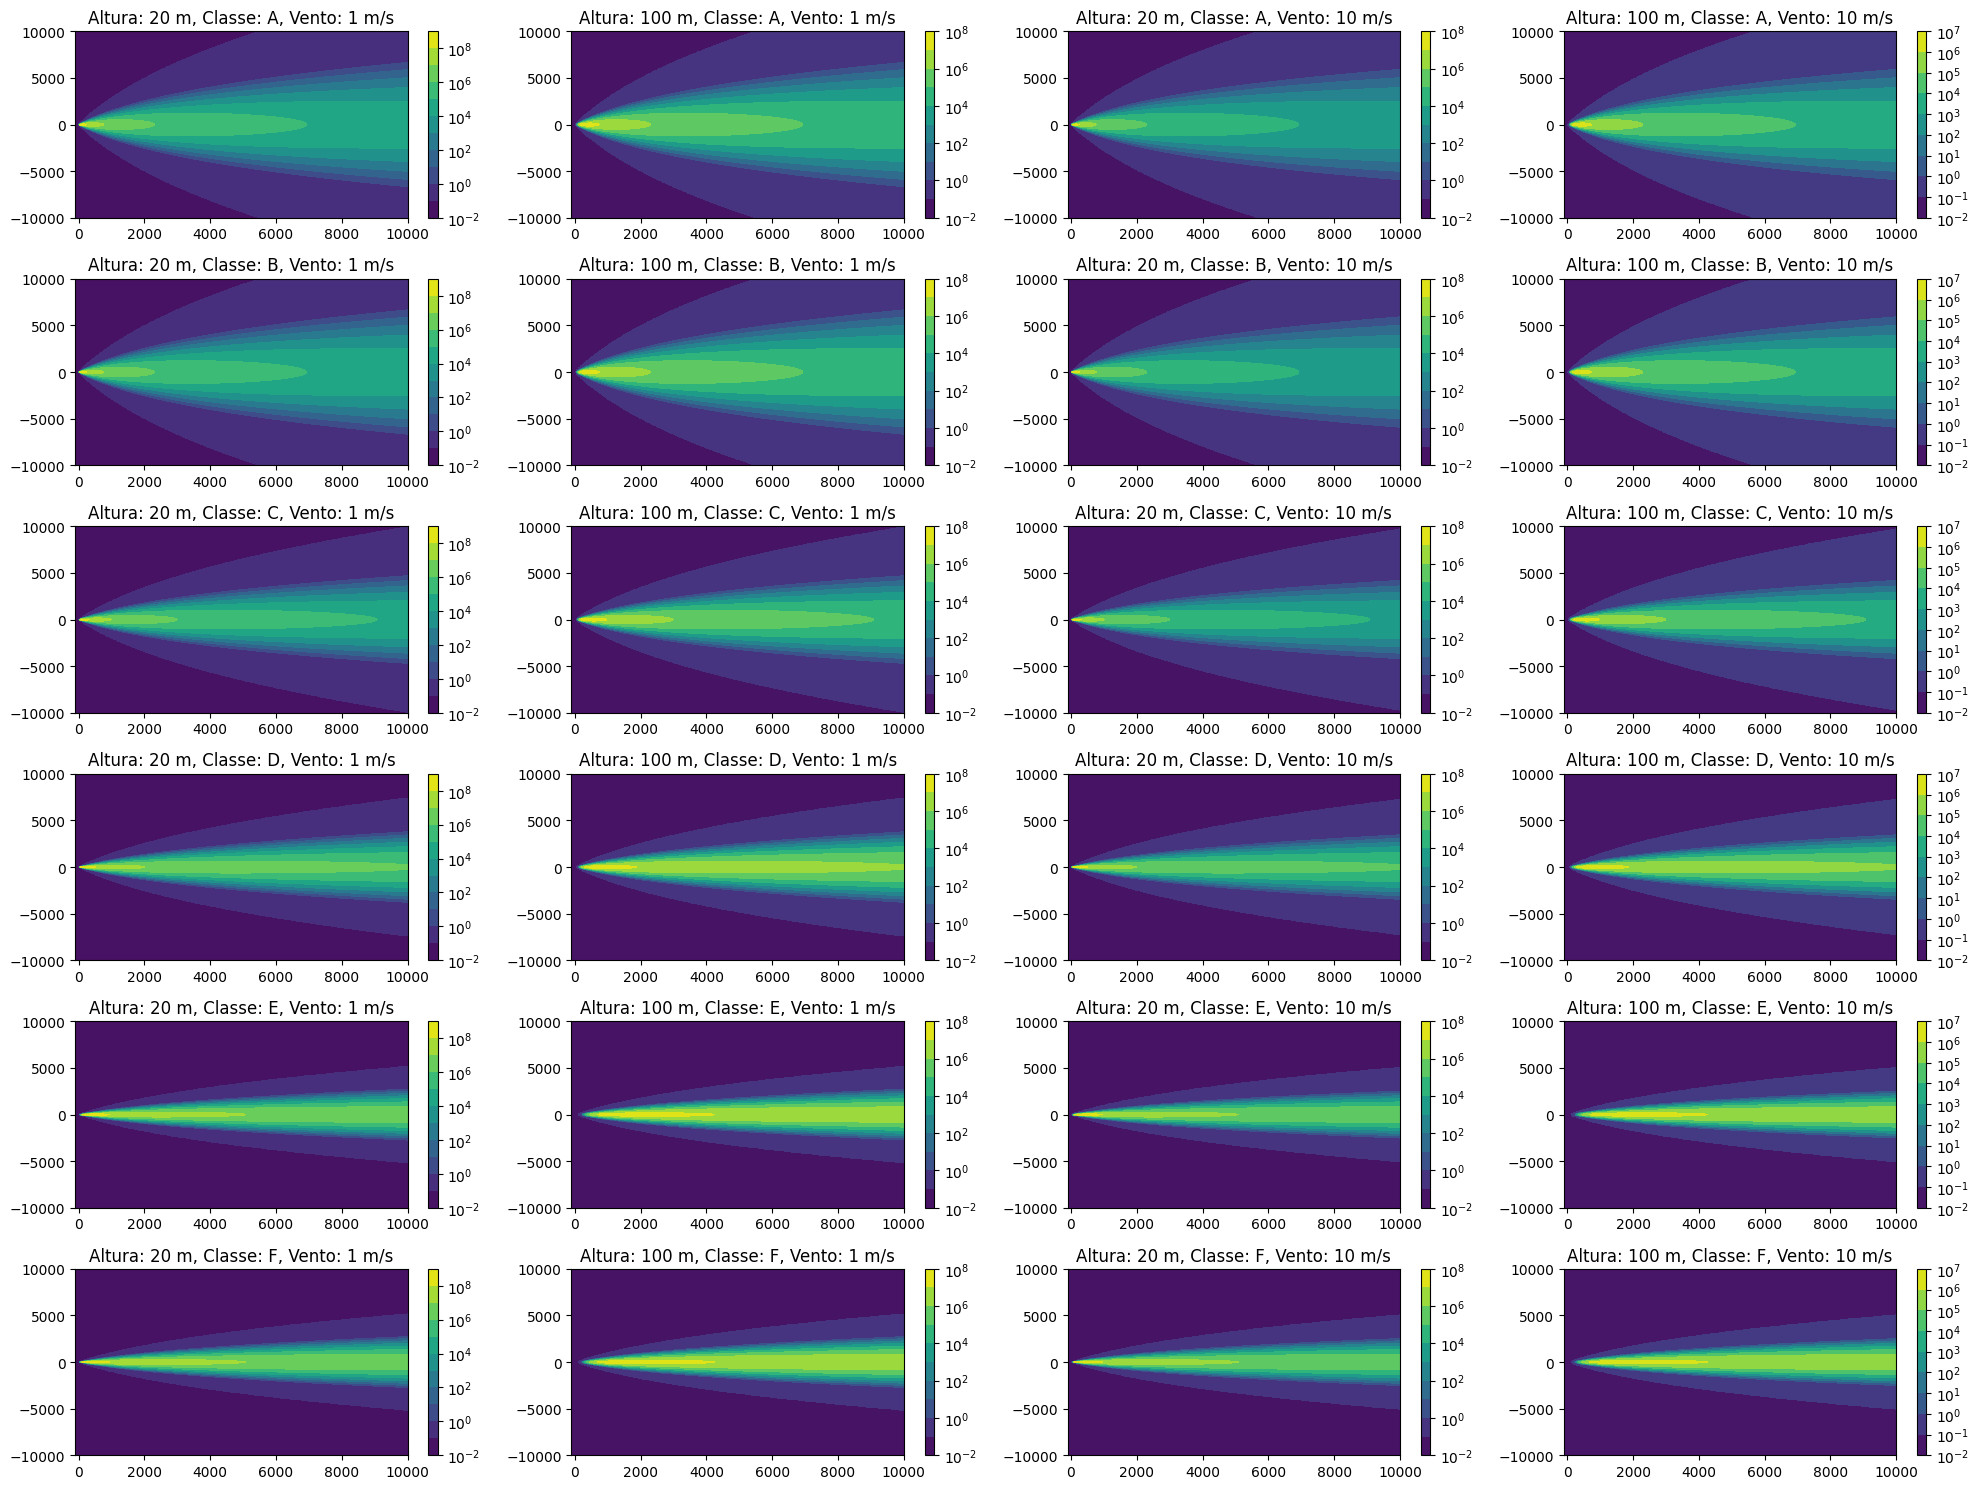

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Dados de entrada
emissoes = {
    'recovery_boiler': {
        'MP': 1679911.6152,  # g/s
        'SO2': 65329.8961,   # g/s
        'CO': 102661.2654    # g/s
    },
    'smelt_tank': {
        'MP': 65329.8961,    # g/s
        'SO2': 1866.5685,    # g/s
        'CO': 0.0            # g/s
    },
    'lime_kiln': {
        'MP': 522639.1692,   # g/s
        'SO2': 2799.8527,    # g/s
        'CO': 933.2842       # g/s
    }
}

velocidades_vento = [1,10]  # Diferentes velocidades do vento (m/s)
classes_estabilidade = ['A', 'B', 'C', 'D', 'E', 'F']  # Classes de estabilidade
area_tipo = 'urbano'  # Tipo de área (urbano ou rural)

# Ponto de interesse para avaliação (x, y, z)
x = np.linspace(-100, 10000, 500)  # Distância na direção do vento (m)
y = 0  # Posição lateral (m)
z = 1.5  # Altura de respiração (m)

# Criando matrizes de x e y
xx, yy = np.meshgrid(x, np.linspace(-10000, 10000, 500))

# Alturas da chaminé para simulação
alturas_chamine = [20, 100]  # Alturas da chaminé (m)

# Listas para armazenar os resultados de concentração para cada altura da chaminé
concs_20m = []
concs_100m = []

# Loop através das alturas da chaminé
for hg in alturas_chamine:
    # Loop através das classes de estabilidade
    for classe in classes_estabilidade:
        # Loop através das velocidades do vento
        for u in velocidades_vento:
            # Calcula sigmaY e sigmaZ (assumindo que são constantes)
            sigmaY, sigmaZ = sigmaXY(x, classe, area_tipo)
            
            # Calcula a altura da pluma h com base na velocidade do vento
            if u > 1.5 * vs:
                deltaHdav = deltaHdavidsonBryant(1, 10, 5, 300, 293)
                deltaHhol = holland_tipdownwash(1, 10, 5, 300, 293)
                hdav = hg + deltaHdav
                hhol = hg + deltaHhol
                h = max(hdav, hhol)
            else:
                h = hg + 2 * 1 * ((10 / 5) - 1.5)

            # Aplica o modelo gaussiano para calcular as concentrações
            conc = modeloGaussiano(emissoes['recovery_boiler']['MP'], sigmaY, sigmaZ, u, yy, z, h)
            
            # Armazena os resultados nas listas correspondentes
            if hg == 20:
                concs_20m.append(conc)
            elif hg == 100:
                concs_100m.append(conc)

# Plotagem dos resultados lado a lado
fig, axs = plt.subplots(len(classes_estabilidade), len(velocidades_vento) * 2, figsize=(20, 15))

# Loop para plotar cada combinação de classe de estabilidade e velocidade do vento
for i, classe in enumerate(classes_estabilidade):
    for j, u in enumerate(velocidades_vento):
        # Índice do subplot
        idx = j * 2
        
        # Plot para 20 m de altura da chaminé
        cf = axs[i, idx].contourf(xx, yy, concs_20m[i * len(velocidades_vento) + j] + 0.1, norm=LogNorm())
        axs[i, idx].set_title(f'Altura: 20 m, Classe: {classe}, Vento: {u} m/s')
        fig.colorbar(cf, ax=axs[i, idx])

        # Plot para 100 m de altura da chaminé
        cf = axs[i, idx + 1].contourf(xx, yy, concs_100m[i * len(velocidades_vento) + j] + 0.1, norm=LogNorm())
        axs[i, idx + 1].set_title(f'Altura: 100 m, Classe: {classe}, Vento: {u} m/s')
        fig.colorbar(cf, ax=axs[i, idx + 1])

plt.tight_layout()
plt.show()

##Conclusão  

A altura da camada limite atmosférica (PBL) é influenciada por diversas condições atmosféricas. A cobertura de nuvens reduz o aquecimento da superfície durante o dia, resultando em uma camada limite mais baixa, enquanto durante a noite, as nuvens atuam como isolantes, mantendo a camada limite mais alta. A radiação solar aquece a superfície durante o dia, elevando a camada limite, enquanto a perda de radiação terrestre à noite a reduz. A velocidade do vento também é crucial: ventos fortes promovem a mistura do ar e elevam a camada limite, enquanto ventos fracos resultam em uma camada limite mais baixa e estável. Essas interações afetam a dispersão de poluentes, a formação de nuvens e as condições climáticas locais.

## Discussão

